# Capstone1 Proposal
Small and medium enterprises (SMEs) are businesses that have revenues, assets and a number of employees below a certain threshold. Although the definition of SMEs is different from country to country, their important role in the economy is undeniable. They are one of the strongest drivers of economic development, innovation and employment. The access to finance is recognized as the greatest obstacle to the growth of SMEs. The financing gap for SMEs is huge. Millions of SMEs have unmet financing needs all over the world. Lenders who can address this matter have great growing potential. The challenge for these lenders is how to manage loan risk efficiently and make accurate decisions. There are two basic risks here: one is a business loss results from not lending the good candidate, and the other is the financial loss for lending the candidate is at bad risk. Therefore, the ability to recognize good candidates who are able to make payments is crucial.

This project focuses on predicting whether a company is going to miss payments if it is lent. The dataset is taken from the South African digital lender Lulalend. The join data set consists of 1346 rows, representing 1346 companies who are already Lulalend’s customers, and 49 columns. This dataset has continuous, nominal and categorical data along with missing values. The variable of interest is “bad”. It contains the payment history of these companies, either 1 meaning company missed payments or 0 meaning company did not miss payments. 


# Data Exploratory

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.datasets import fetch_datasets
from imblearn.metrics import classification_report_imbalanced

/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is

In [3]:
import sys
!conda install --yes --prefix {sys.prefix} scikit-learn

Solving environment: done

# All requested packages already installed.



In [4]:
from sklearn.impute import SimpleImputer

### Loading data and Reading it.

In [5]:
start_df=pd.read_csv('/Users/vnguyenair/Desktop/vy_capstone1/NEW_DATA.csv',low_memory=False)

In [6]:
start_df.head()

,AssessmentRunId,province,AdvanceId,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,...,business_social_media_presence,business_industry,business_linked_to_affiliate,business_linked_to_partner,business_has_website,business_account_linked,director_credit_rating,codix_score,bank_balance_affordability,turnover_consistency
0,38389,WesternCape,33325,1,20000.00,4533.34,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.659764,0.630893,0.141855,0.439428
1,38173,WesternCape,33114,0,0.00,0.00,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.759578,0.717661,0.621779,0.433922
2,38138,Gauteng,33075,0,0.00,-19466.66,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.483418,0.000000,0.127326,0.356817
3,37642,WesternCape,32689,0,416666.66,52916.67,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.792966,0.949238,0.239715,0.400076
4,37376,Gauteng,32563,0,0.00,-87173.10,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.736877,0.000000,0.514813,0.349812


In [7]:
more_df=pd.read_csv('/Users/vnguyenair/Desktop/vy_capstone1/More_data.csv',low_memory=False)

In [8]:
more_df.head()

,advance_id,company_id,gender,direct_birthday,reason_bridging_loan,reason_equipment_purchase,reason_inventory_purchase,reason_marketing,reason_pay_a_bill,reason_pay_a_salary,reason_refinance
0,25174,28310,Male,4/20/1983,0,0,0,0,0,0,3
1,27061,28310,Male,4/20/1983,0,0,0,0,0,0,3
2,33272,28310,Male,4/20/1983,0,0,0,0,0,0,3
3,11777,13050,Male,3/27/1969,0,0,1,0,1,0,15
4,11900,13050,Male,3/27/1969,0,0,1,0,1,0,15


In [9]:
join_df=pd.merge(start_df,more_df[['advance_id','gender', 'direct_birthday',
       'reason_bridging_loan', 'reason_equipment_purchase',
       'reason_inventory_purchase', 'reason_marketing', 'reason_pay_a_bill',
       'reason_pay_a_salary']],
                left_on='AdvanceId',
                right_on= 'advance_id',
                how='left')

In [10]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1345
Data columns (total 49 columns):
AssessmentRunId                        1346 non-null int64
province                               1346 non-null object
AdvanceId                              1346 non-null int64
bad                                    1346 non-null int64
outstanding_capital                    1346 non-null float64
balance                                1346 non-null float64
overdraft_limit_exceeds                391 non-null float64
recent_long_term_consumer_liability    764 non-null float64
minimum_latest_bank_statements         820 non-null float64
minimum_consumer_assets                820 non-null float64
minimum_tax_activity                   820 non-null float64
other_funding                          1247 non-null float64
minimum_other_funding                  1248 non-null float64
unpaids                                1247 non-null float64
minimum_unpaids                        1248 non-nul

In [11]:
join_df.head()

,AssessmentRunId,province,AdvanceId,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,...,turnover_consistency,advance_id,gender,direct_birthday,reason_bridging_loan,reason_equipment_purchase,reason_inventory_purchase,reason_marketing,reason_pay_a_bill,reason_pay_a_salary
0,38389,WesternCape,33325,1,20000.00,4533.34,0.0,1.0,1.0,1.0,...,0.439428,33325,Female,3/22/1987,0,0,0,0,0,0
1,38173,WesternCape,33114,0,0.00,0.00,0.0,1.0,1.0,1.0,...,0.433922,33114,Male,4/23/1986,0,0,1,0,0,0
2,38138,Gauteng,33075,0,0.00,-19466.66,1.0,1.0,1.0,1.0,...,0.356817,33075,Male,9/13/1978,0,2,2,0,0,0
3,37642,WesternCape,32689,0,416666.66,52916.67,1.0,1.0,1.0,1.0,...,0.400076,32689,Male,2/11/1956,1,0,0,0,0,0
4,37376,Gauteng,32563,0,0.00,-87173.10,1.0,1.0,1.0,1.0,...,0.349812,32563,Female,6/14/1987,1,0,0,0,0,0


The variables 'province','AssessmentRunId', 'AdvanceId' and 'advance_id' do not play any role in the prediction, we are going to get rid of them.

In [12]:
cols=[ 'bad',
       'outstanding_capital', 'balance', 'overdraft_limit_exceeds',
       'recent_long_term_consumer_liability', 'minimum_latest_bank_statements',
       'minimum_consumer_assets', 'minimum_tax_activity', 'other_funding',
       'minimum_other_funding', 'unpaids', 'minimum_unpaids',
       'minimum_source_of_income', 'minimum_decreasing_overdraft',
       'source_of_income', 'overdraft', 'liquidity', 'minimum_current_arrears',
       'minimum_codix_outcome', 'previous_funding_repayment',
       'minimum_bank_statements', 'minimum_balance_based_affordability',
       'minimum_requirements', 'business_health',
       'self_published_time_in_business', 'home_ownership_status',
       'time_at_personal_residence', 'business_social_media_presence',
       'business_industry', 'business_linked_to_affiliate',
       'business_linked_to_partner', 'business_has_website',
       'business_account_linked', 'director_credit_rating', 'codix_score',
       'bank_balance_affordability', 'turnover_consistency','gender', 'direct_birthday',
       'reason_bridging_loan', 'reason_equipment_purchase',
       'reason_inventory_purchase', 'reason_marketing', 'reason_pay_a_bill',
       'reason_pay_a_salary']

In [13]:
df=join_df.loc[:,cols]

In [14]:
df.head()

,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,minimum_tax_activity,other_funding,minimum_other_funding,...,bank_balance_affordability,turnover_consistency,gender,direct_birthday,reason_bridging_loan,reason_equipment_purchase,reason_inventory_purchase,reason_marketing,reason_pay_a_bill,reason_pay_a_salary
0,1,20000.00,4533.34,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.141855,0.439428,Female,3/22/1987,0,0,0,0,0,0
1,0,0.00,0.00,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.621779,0.433922,Male,4/23/1986,0,0,1,0,0,0
2,0,0.00,-19466.66,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.127326,0.356817,Male,9/13/1978,0,2,2,0,0,0
3,0,416666.66,52916.67,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.239715,0.400076,Male,2/11/1956,1,0,0,0,0,0
4,0,0.00,-87173.10,1.0,1.0,1.0,1.0,1.0,0.5,0.0,...,0.514813,0.349812,Female,6/14/1987,1,0,0,0,0,0


In [15]:
df['direct_birthday']=pd.to_datetime(df['direct_birthday'],format='%m/%d/%Y')


In [16]:
df.head()

,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,minimum_tax_activity,other_funding,minimum_other_funding,...,bank_balance_affordability,turnover_consistency,gender,direct_birthday,reason_bridging_loan,reason_equipment_purchase,reason_inventory_purchase,reason_marketing,reason_pay_a_bill,reason_pay_a_salary
0,1,20000.00,4533.34,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.141855,0.439428,Female,1987-03-22,0,0,0,0,0,0
1,0,0.00,0.00,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.621779,0.433922,Male,1986-04-23,0,0,1,0,0,0
2,0,0.00,-19466.66,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.127326,0.356817,Male,1978-09-13,0,2,2,0,0,0
3,0,416666.66,52916.67,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.239715,0.400076,Male,1956-02-11,1,0,0,0,0,0
4,0,0.00,-87173.10,1.0,1.0,1.0,1.0,1.0,0.5,0.0,...,0.514813,0.349812,Female,1987-06-14,1,0,0,0,0,0


### Creating Dummy variable for categorical variable 'gender'

In [17]:
pd.get_dummies(df,drop_first=True)

,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,minimum_tax_activity,other_funding,minimum_other_funding,...,bank_balance_affordability,turnover_consistency,direct_birthday,reason_bridging_loan,reason_equipment_purchase,reason_inventory_purchase,reason_marketing,reason_pay_a_bill,reason_pay_a_salary,gender_Male
0,1,20000.00,4533.34,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.141855,0.439428,1987-03-22,0,0,0,0,0,0,0
1,0,0.00,0.00,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.621779,0.433922,1986-04-23,0,0,1,0,0,0,1
2,0,0.00,-19466.66,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.127326,0.356817,1978-09-13,0,2,2,0,0,0,1
3,0,416666.66,52916.67,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.239715,0.400076,1956-02-11,1,0,0,0,0,0,1
4,0,0.00,-87173.10,1.0,1.0,1.0,1.0,1.0,0.5,0.0,...,0.514813,0.349812,1987-06-14,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.087783,0.762177,1972-05-04,1,4,1,0,0,0,1
1342,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.087783,0.762177,1972-05-04,1,4,1,0,0,0,1
1343,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.087783,0.762177,1972-05-04,1,4,1,0,0,0,1
1344,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.955476,0.302789,1979-10-22,0,3,0,0,0,0,1


### Understanding features in the dataset.

We have a fair amount of columns that we need to understand. Knowing what the columns mean can help us a lot later. First, let's check the description of the features in the dataset.

In [18]:
df_description=pd.read_excel('/Users/vnguyenair/Desktop/vy_capstone1/Data_Description.xlsx').dropna()
df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,Features,Description
0,bad,Binary variable determines whether the company would be a good customer. The outcome 1 means company missed payments.
1,outstanding_capital,The amount of money outstanding on current loan.
2,balance,The amount of arrears. If balance > 0 then the company is in arrears.
3,overdraft_limit_exceeds,Binary variable suggesting overdraft.
4,recent_long_term_consumer_liability,Binary variable determines whether the client has any long term debt.
5,minimum_latest_bank_statements,"Binary variable determines whether the customer submitted all bank statemtns,"
6,minimum_consumer_assets,Binary variable determines whether the company has assets to back its loan.
7,minimum_tax_activity,Binary variable suggesting whether a company is submitting tax returns.
8,other_funding,suggesting level of confindence that company has a loan elsewhere.
9,minimum_other_funding,Binary variable suggesting whether company has a loan elsewhere.


In [19]:
df.describe()

,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,minimum_tax_activity,other_funding,minimum_other_funding,...,director_credit_rating,codix_score,bank_balance_affordability,turnover_consistency,reason_bridging_loan,reason_equipment_purchase,reason_inventory_purchase,reason_marketing,reason_pay_a_bill,reason_pay_a_salary
count,1346.000000,1.346000e+03,1.346000e+03,391.000000,764.000000,820.000000,820.000000,820.000000,1247.000000,1248.000000,...,1345.000000,1345.000000,1345.000000,1345.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,0.112927,1.408488e+04,-2.050561e+04,0.468031,0.769634,0.657317,0.742683,0.504878,0.075381,0.836538,...,0.514096,0.253386,0.495082,0.363938,0.777860,0.505201,0.928678,0.051263,0.144131,0.052749
std,0.316621,8.625915e+04,9.118407e+04,0.499616,0.421343,0.474896,0.437422,0.500281,0.200399,0.369934,...,0.252653,0.347672,0.305556,0.294828,1.849461,1.244904,1.745766,0.298027,0.577160,0.274376
min,0.000000,0.000000e+00,-1.276042e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.370872,0.000000,0.242062,0.084427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.600357,0.000000,0.469551,0.302789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.712707,0.670858,0.756950,0.576324,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.500000e+06,4.336423e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.873333,0.957192,1.000000,1.000000,15.000000,9.000000,11.000000,3.000000,6.000000,3.000000


## Variables Selection
We have 44 independent variable and one target variable 'bad'. We first want to look at the correlation between these variables.

#### Correlation Matrix

[Text(0.5, 0, 'bad'),
 Text(1.5, 0, 'outstanding_capital'),
 Text(2.5, 0, 'balance'),
 Text(3.5, 0, 'overdraft_limit_exceeds'),
 Text(4.5, 0, 'recent_long_term_consumer_liability'),
 Text(5.5, 0, 'minimum_latest_bank_statements'),
 Text(6.5, 0, 'minimum_consumer_assets'),
 Text(7.5, 0, 'minimum_tax_activity'),
 Text(8.5, 0, 'other_funding'),
 Text(9.5, 0, 'minimum_other_funding'),
 Text(10.5, 0, 'unpaids'),
 Text(11.5, 0, 'minimum_unpaids'),
 Text(12.5, 0, 'minimum_source_of_income'),
 Text(13.5, 0, 'minimum_decreasing_overdraft'),
 Text(14.5, 0, 'source_of_income'),
 Text(15.5, 0, 'overdraft'),
 Text(16.5, 0, 'liquidity'),
 Text(17.5, 0, 'minimum_current_arrears'),
 Text(18.5, 0, 'minimum_codix_outcome'),
 Text(19.5, 0, 'previous_funding_repayment'),
 Text(20.5, 0, 'minimum_bank_statements'),
 Text(21.5, 0, 'minimum_balance_based_affordability'),
 Text(22.5, 0, 'minimum_requirements'),
 Text(23.5, 0, 'business_health'),
 Text(24.5, 0, 'self_published_time_in_business'),
 Text(25.5, 0,

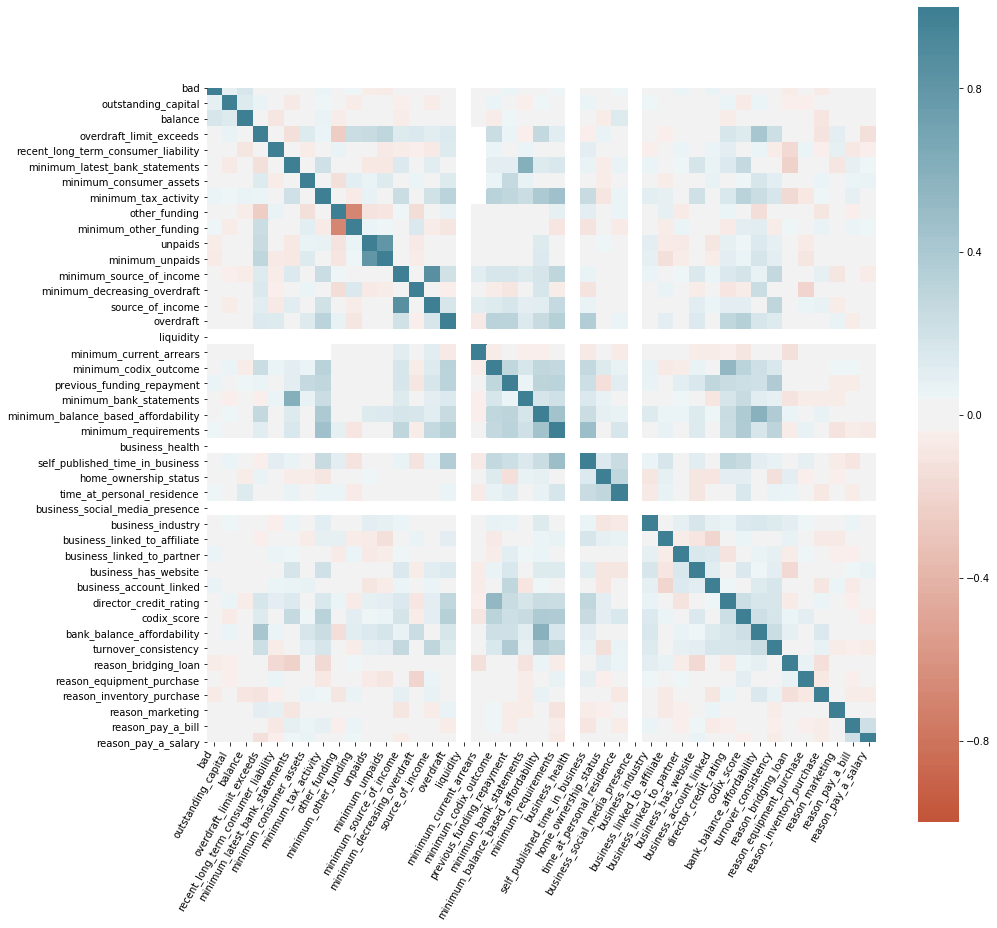

In [20]:
corr=df.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')

We are only interested in variables which have some kind of realtion with the target variable 'bad'.Therefore, in the next step we look at varibles whose the absolute value of correlation with the target variable is more than 0.03.

In [21]:
cor_target=abs(corr['bad'])
relevant_features=cor_target[cor_target>0.03]

In [22]:
print(relevant_features)

bad                           1.000000
outstanding_capital           0.083174
balance                       0.158734
minimum_tax_activity          0.052386
other_funding                 0.037881
minimum_other_funding         0.046293
unpaids                       0.061247
minimum_unpaids               0.062841
previous_funding_repayment    0.059176
minimum_requirements          0.043266
home_ownership_status         0.030397
time_at_personal_residence    0.045399
business_linked_to_partner    0.050657
business_has_website          0.035855
business_account_linked       0.062632
reason_bridging_loan          0.052355
reason_inventory_purchase     0.064778
Name: bad, dtype: float64


As we can see, there are 16 variables having some kind of relation with the target variable 'bad'. We now look at the correlations between these variables to find the one highly correlated.

In [23]:
corr_new=corr.loc[abs(corr['bad'])>0.03,relevant_features.index.tolist()]

[Text(0.5, 0, 'bad'),
 Text(1.5, 0, 'outstanding_capital'),
 Text(2.5, 0, 'balance'),
 Text(3.5, 0, 'minimum_tax_activity'),
 Text(4.5, 0, 'other_funding'),
 Text(5.5, 0, 'minimum_other_funding'),
 Text(6.5, 0, 'unpaids'),
 Text(7.5, 0, 'minimum_unpaids'),
 Text(8.5, 0, 'previous_funding_repayment'),
 Text(9.5, 0, 'minimum_requirements'),
 Text(10.5, 0, 'home_ownership_status'),
 Text(11.5, 0, 'time_at_personal_residence'),
 Text(12.5, 0, 'business_linked_to_partner'),
 Text(13.5, 0, 'business_has_website'),
 Text(14.5, 0, 'business_account_linked'),
 Text(15.5, 0, 'reason_bridging_loan'),
 Text(16.5, 0, 'reason_inventory_purchase')]

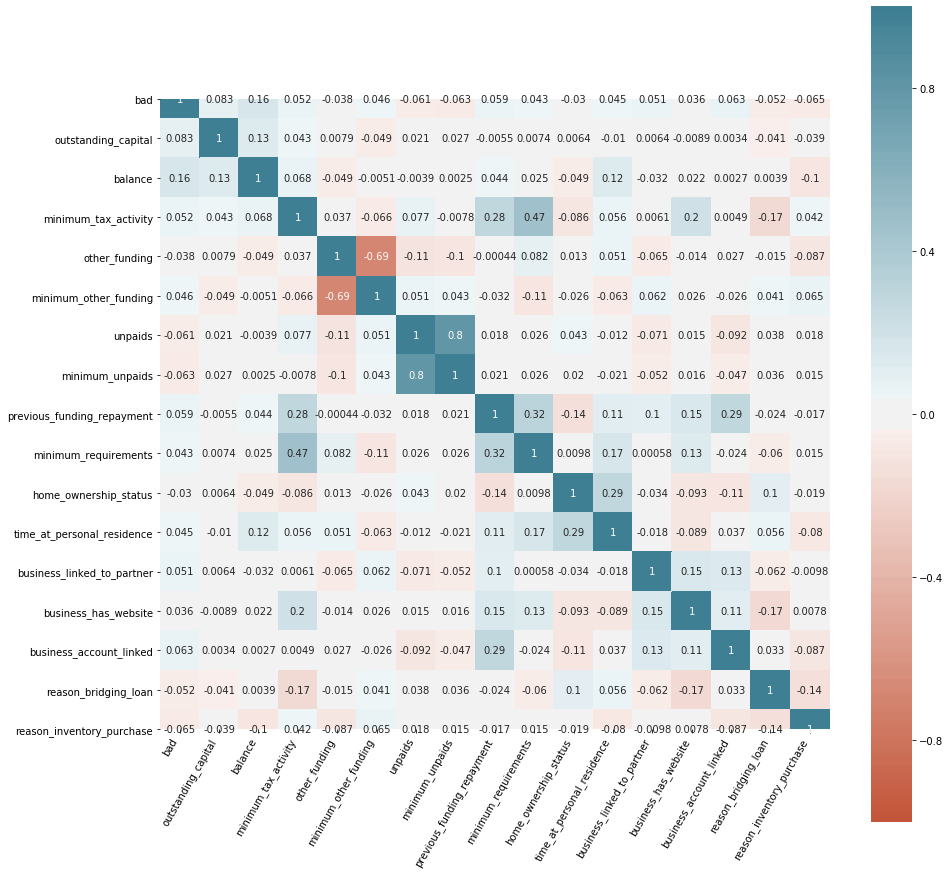

In [24]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(corr_new,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')

 From the above heat map, it is seen that three pairs of features having high correlation. They are 'minimum_unpaids' and 'unpaids', 'minimum_other_funding' and 'other_funding', and 'minimum_requirements' and 'minimum_tax_activity'. Hence, we would only keep one from each pair. We will keep 'minimum_unpaid','minimum_other_funding'and 'minimum_tax_activity'since their correlation with 'bad' are higher than that of 'unpaids','other_funding' and 'minimum_requirements'. 

In [25]:
relevant_features.index.tolist()

['bad',
 'outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'other_funding',
 'minimum_other_funding',
 'unpaids',
 'minimum_unpaids',
 'previous_funding_repayment',
 'minimum_requirements',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked',
 'reason_bridging_loan',
 'reason_inventory_purchase']

In [26]:
df_new=df.loc[:, ['bad',
 'outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'minimum_other_funding',
 'minimum_unpaids',
 'previous_funding_repayment',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked',
 'reason_bridging_loan',
 'reason_inventory_purchase']]

In [27]:
df_new.head()

,bad,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked,reason_bridging_loan,reason_inventory_purchase
0,1,20000.00,4533.34,1.0,1.0,1.0,1.0,0.0,0.75,0.0,1.0,1.0,0,0
1,0,0.00,0.00,1.0,1.0,1.0,0.0,0.5,0.50,0.0,1.0,0.0,0,1
2,0,0.00,-19466.66,0.0,1.0,1.0,0.0,0.5,1.00,0.0,0.0,0.0,0,2
3,0,416666.66,52916.67,1.0,1.0,1.0,0.0,0.5,0.50,0.0,1.0,0.0,1,0
4,0,0.00,-87173.10,1.0,0.0,1.0,1.0,0.0,0.50,0.0,1.0,1.0,1,0


In [28]:
df_new.tail()

,bad,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked,reason_bridging_loan,reason_inventory_purchase
1341,0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.75,0.0,0.0,0.0,1,1
1342,0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.75,0.0,0.0,0.0,1,1
1343,0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.75,0.0,0.0,0.0,1,1
1344,0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.25,0.0,0.0,1.0,0,0
1345,0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.25,0.0,0.0,1.0,0,0


In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1345
Data columns (total 14 columns):
bad                           1346 non-null int64
outstanding_capital           1346 non-null float64
balance                       1346 non-null float64
minimum_tax_activity          820 non-null float64
minimum_other_funding         1248 non-null float64
minimum_unpaids               1248 non-null float64
previous_funding_repayment    1286 non-null float64
home_ownership_status         1345 non-null float64
time_at_personal_residence    1345 non-null float64
business_linked_to_partner    1345 non-null float64
business_has_website          1345 non-null float64
business_account_linked       1345 non-null float64
reason_bridging_loan          1346 non-null int64
reason_inventory_purchase     1346 non-null int64
dtypes: float64(11), int64(3)
memory usage: 157.7 KB


In [30]:
X=df_new.loc[:,['outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'minimum_other_funding',
 'minimum_unpaids',
 'previous_funding_repayment',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked',
 'reason_bridging_loan',
 'reason_inventory_purchase']]
y=df_new.loc[:,['bad']]

### Handling Missing Data

In [31]:
df_new.isnull().sum()

bad                             0
outstanding_capital             0
balance                         0
minimum_tax_activity          526
minimum_other_funding          98
minimum_unpaids                98
previous_funding_repayment     60
home_ownership_status           1
time_at_personal_residence      1
business_linked_to_partner      1
business_has_website            1
business_account_linked         1
reason_bridging_loan            0
reason_inventory_purchase       0
dtype: int64

In [35]:
imp=SimpleImputer(missing_values= np.nan, strategy='most_frequent')
imp.fit(X)
X=imp.transform(X)

### Variables Distribution

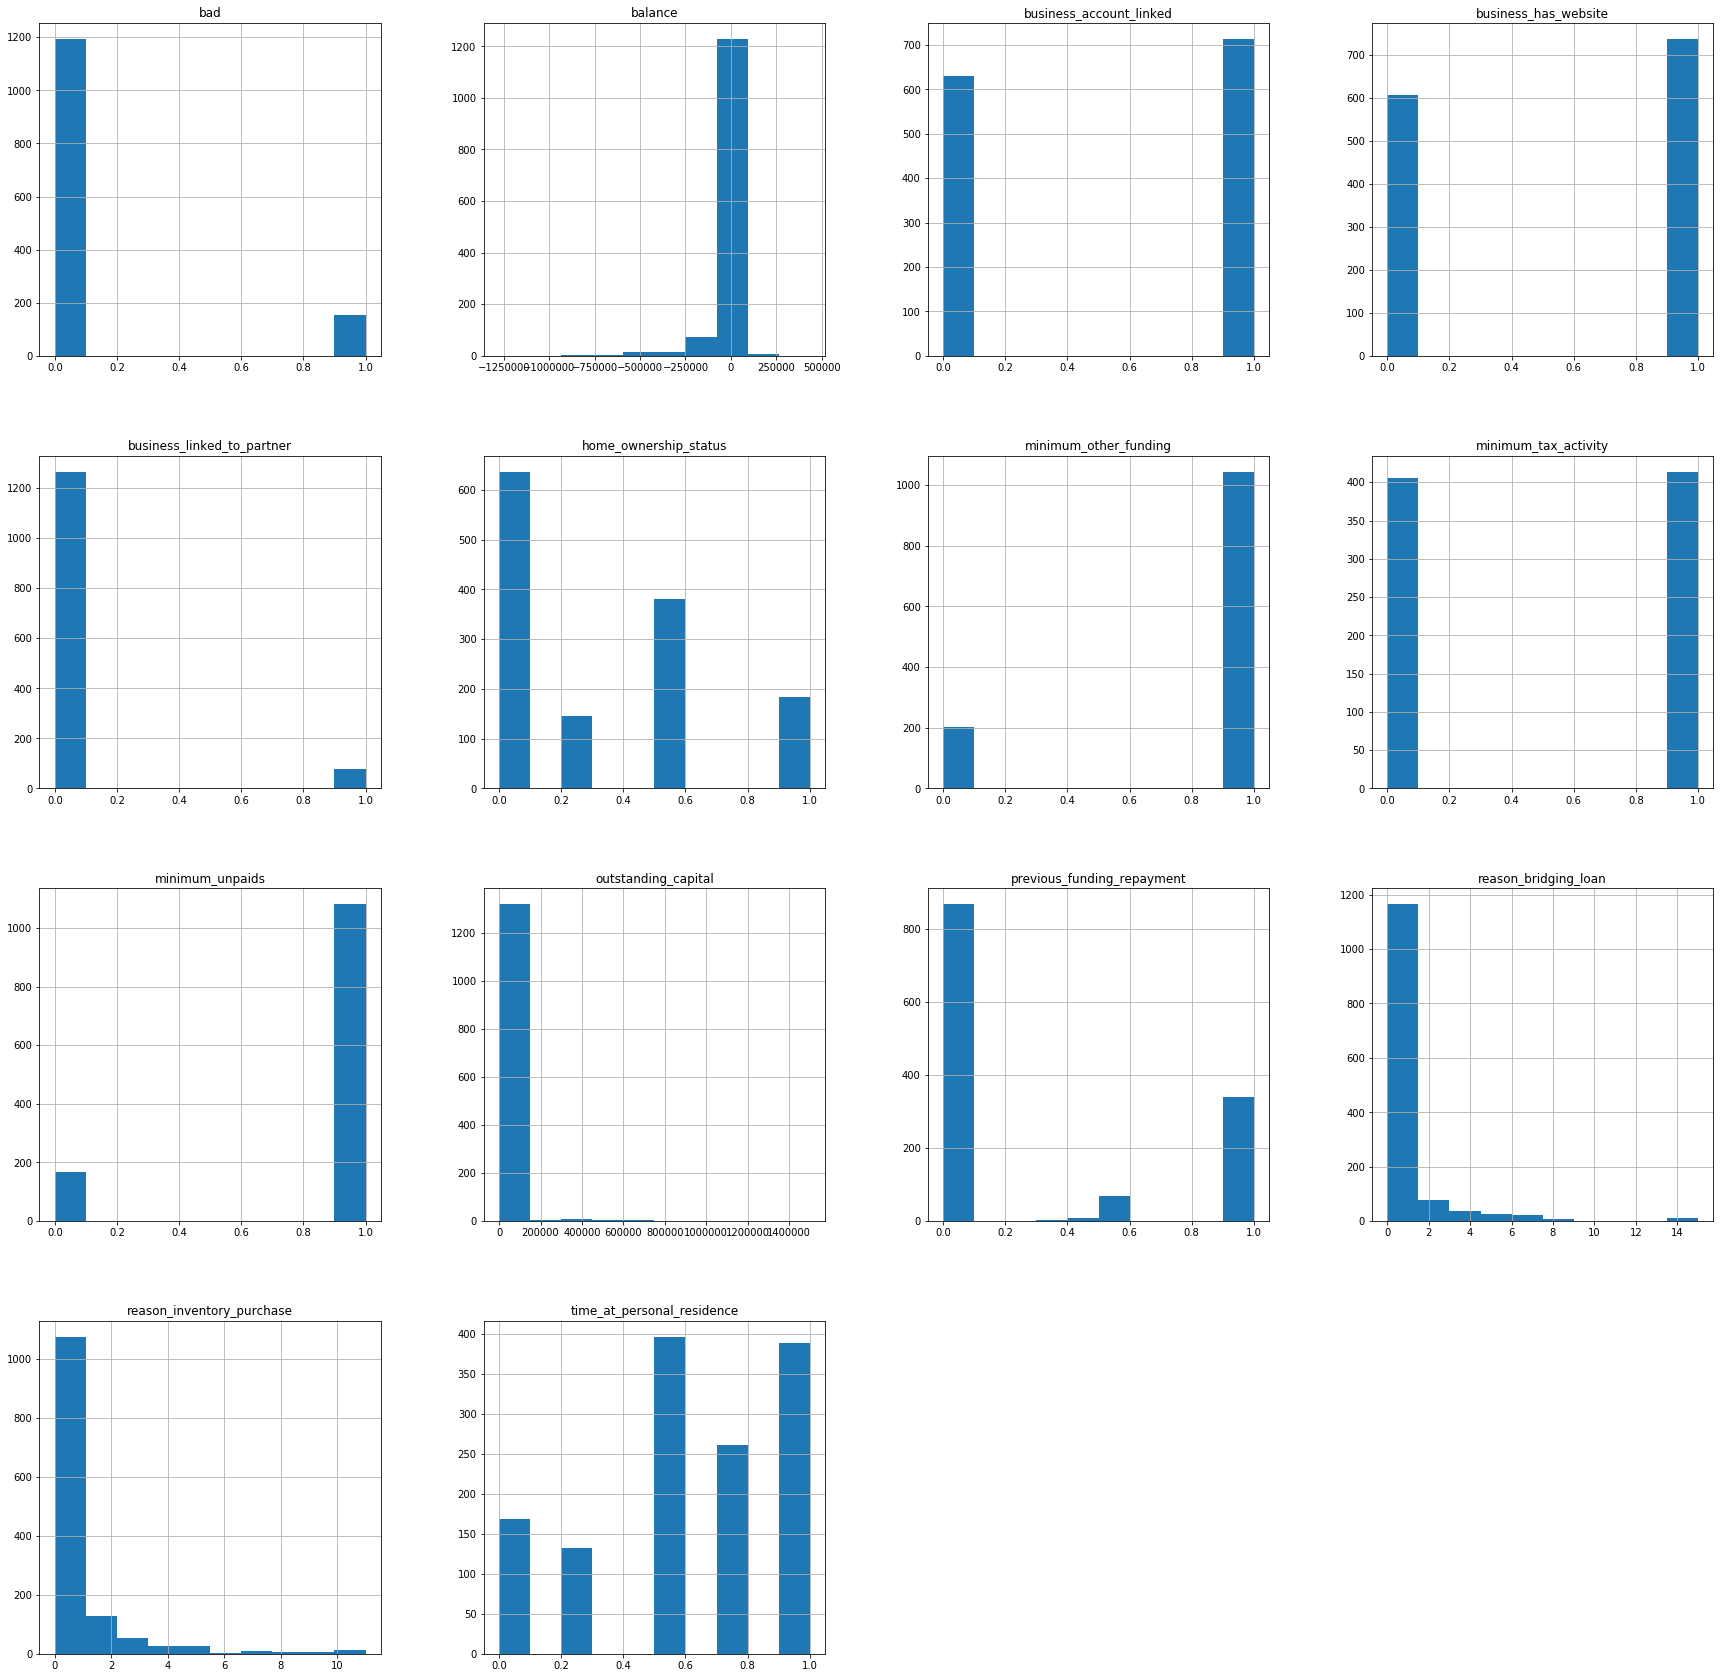

<Figure size 432x288 with 0 Axes>

In [36]:
df_new.hist(figsize=(30,30))
plt.figure()
plt.show()

/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


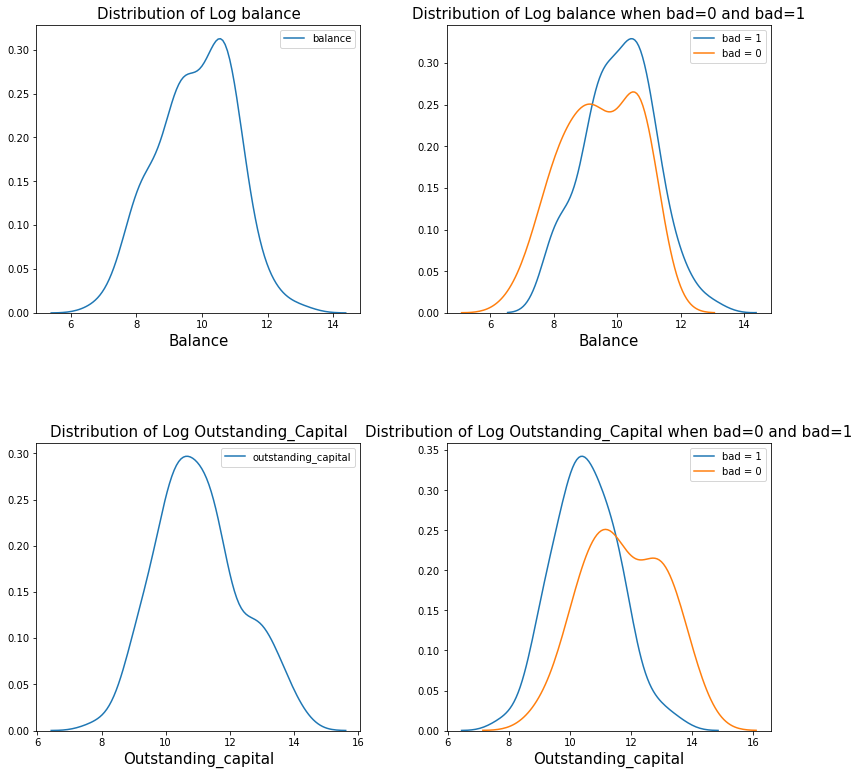

In [37]:
plt.axes([0.05,0.05,0.75,1])
sns.kdeplot(np.log(df['outstanding_capital']))
plt.xlabel('Outstanding_capital',fontsize=15)
plt.title('Distribution of Log Outstanding_Capital',fontsize=15);

plt.axes([1,0.05,0.75,1])
sns.kdeplot(np.log(df.loc[df['bad'] == 1, 'outstanding_capital']), label = 'bad = 1')
sns.kdeplot(np.log(df.loc[df['bad'] == 0, 'outstanding_capital']), label = 'bad = 0');
plt.xlabel('Outstanding_capital',fontsize=15)
plt.title('Distribution of Log Outstanding_Capital when bad=0 and bad=1',fontsize=15);

plt.axes([0.05,1.5,0.75,1])
sns.kdeplot(np.log(df['balance']))
plt.xlabel('Balance',fontsize=15)
plt.title('Distribution of Log balance',fontsize=15);

plt.axes([1,1.5,0.75,1])
sns.kdeplot(np.log(df.loc[df['bad'] == 1, 'balance']), label = 'bad = 1')
sns.kdeplot(np.log(df.loc[df['bad'] == 0, 'balance']), label = 'bad = 0');
plt.xlabel('Balance',fontsize=15)
plt.title('Distribution of Log balance when bad=0 and bad=1',fontsize=15);

plt.show()

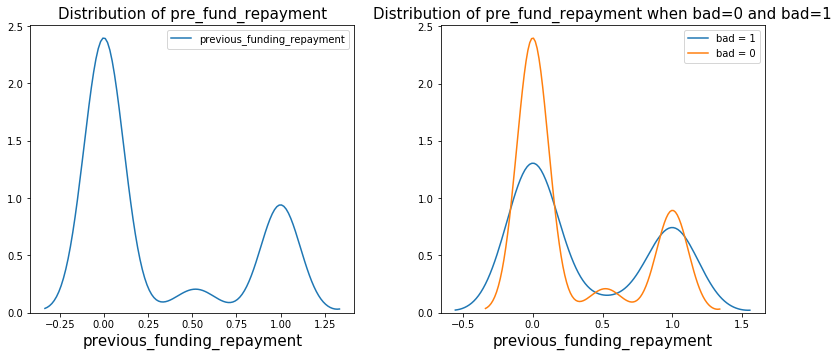

In [59]:
plt.axes([0.05,1.5,0.75,1])
sns.kdeplot(df['previous_funding_repayment'])
plt.xlabel('previous_funding_repayment',fontsize=15)
plt.title('Distribution of pre_fund_repayment',fontsize=15);

plt.axes([1,1.5,0.75,1])
sns.kdeplot((df.loc[df['bad'] == 1, 'previous_funding_repayment']), label = 'bad = 1')
sns.kdeplot((df.loc[df['bad'] == 0, 'previous_funding_repayment']), label = 'bad = 0');
plt.xlabel('previous_funding_repayment',fontsize=15)
plt.title('Distribution of pre_fund_repayment when bad=0 and bad=1',fontsize=15);

plt.show()

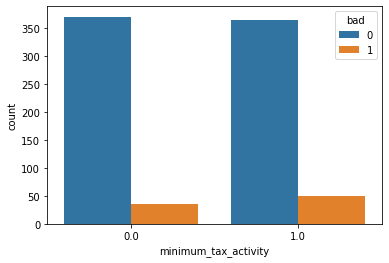

In [38]:
sns.countplot(x='minimum_tax_activity',hue='bad',data=df)
plt.show()

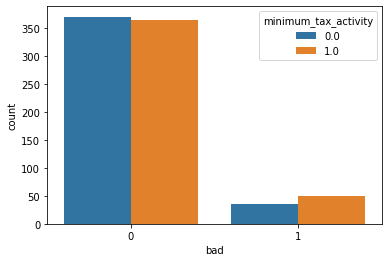

In [43]:
sns.countplot(hue='minimum_tax_activity',x='bad',data=df)
plt.show()

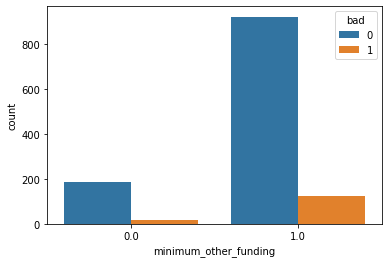

In [50]:
sns.countplot(x='minimum_other_funding',hue='bad',data=df)
plt.show()

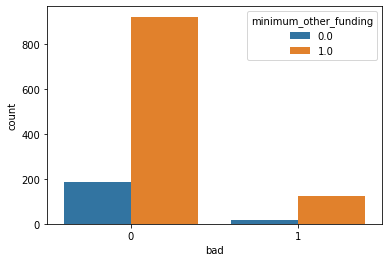

In [51]:
sns.countplot(hue='minimum_other_funding',x='bad',data=df)
plt.show()

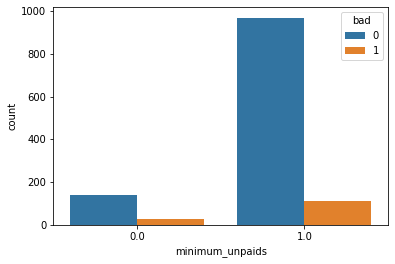

In [52]:
sns.countplot(x='minimum_unpaids',hue='bad',data=df)
plt.show()

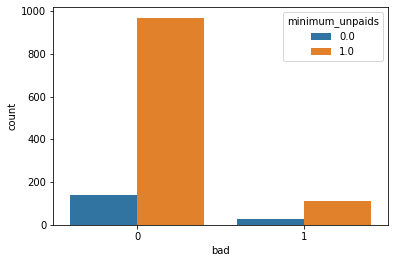

In [53]:
sns.countplot(hue='minimum_unpaids',x='bad',data=df)
plt.show()

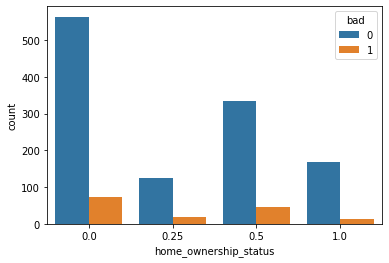

In [60]:
sns.countplot(x='home_ownership_status',hue='bad',data=df)
plt.show()

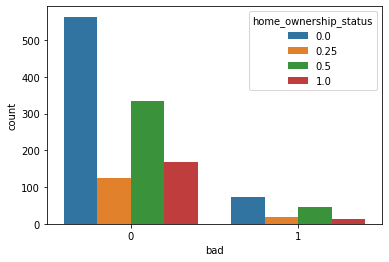

In [61]:
sns.countplot(hue='home_ownership_status',x='bad',data=df)
plt.show()

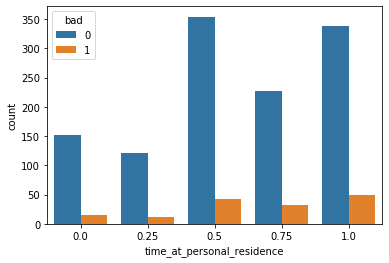

In [62]:
sns.countplot(x='time_at_personal_residence',hue='bad',data=df)
plt.show()

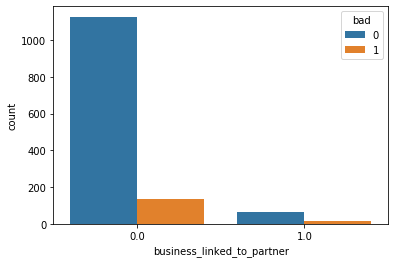

In [63]:
sns.countplot(x='business_linked_to_partner',hue='bad',data=df)
plt.show()

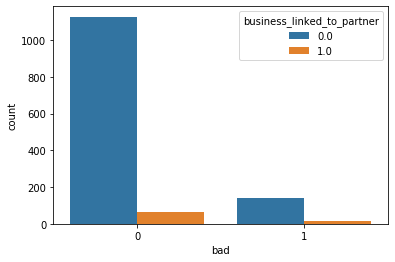

In [64]:
sns.countplot(hue='business_linked_to_partner',x='bad',data=df)
plt.show()

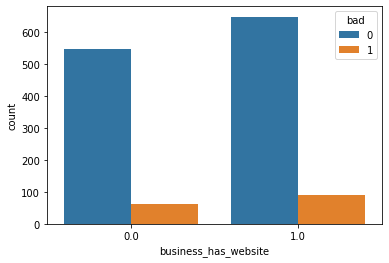

In [65]:
sns.countplot(x='business_has_website',hue='bad',data=df)
plt.show()

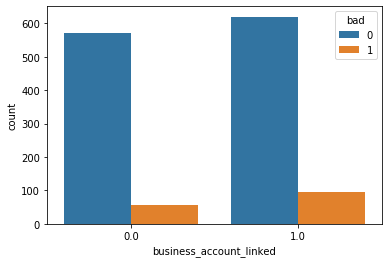

In [66]:
sns.countplot(x='business_account_linked',hue='bad',data=df)
plt.show()

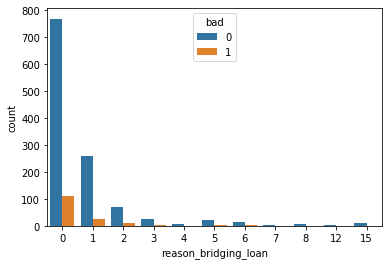

In [67]:
sns.countplot(x='reason_bridging_loan',hue='bad',data=df)
plt.show()

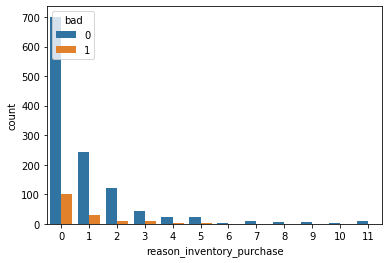

In [69]:
sns.countplot(x='reason_inventory_purchase',hue='bad',data=df)
plt.show()

In [44]:
df_new_one=df_new.loc[df_new['bad'] == 1, :]
df_new_zero=df_new.loc[df_new['bad']==0,:]
df_new_one_mean=df_new_one.mean()
df_new_mean=df_new.mean()
df_new_zero_mean=df_new_zero.mean()

In [48]:
compare_mean=pd.DataFrame(index=df_new.columns,data={'original mean': df_new_mean.tolist(),'Bad mean':df_new_one_mean.tolist(),'Non_Bad mean':df_new_zero_mean.tolist()})

In [49]:
print(compare_mean)

                            original mean      Bad mean  Non_Bad mean
bad                              0.112927      1.000000      0.000000
outstanding_capital          14084.883421  34185.609243  11525.997052
balance                     -20505.607418  20045.869013 -25667.939426
minimum_tax_activity             0.504878      0.581395      0.495913
minimum_other_funding            0.836538      0.884892      0.830478
minimum_unpaids                  0.866186      0.805755      0.873760
previous_funding_repayment       0.295961      0.368918      0.286690
home_ownership_status            0.304275      0.274671      0.308047
time_at_personal_residence       0.605762      0.648026      0.600377
business_linked_to_partner       0.058736      0.092105      0.054484
business_has_website             0.548699      0.598684      0.542330
business_account_linked          0.530855      0.618421      0.519698
reason_bridging_loan             0.777860      0.506579      0.812395
reason_inventory_pur

# Machine Learning

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [71]:
y_train.describe()

,bad
count,942.000000
mean,0.114650
std,0.318768
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [72]:
df_X_train=pd.DataFrame(data=X_train,index=y_train.index,columns=['outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'minimum_other_funding',
 'minimum_unpaids',
 'previous_funding_repayment',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked',
 'reason_bridging_loan',
 'reason_inventory_purchase'])

In [73]:
df_X_train.head()

,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked,reason_bridging_loan,reason_inventory_purchase
1251,0.0,0.0,1.0,1.0,1.0,0.0,0.00,0.00,0.0,1.0,1.0,1.0,0.0
260,0.0,0.0,0.0,1.0,1.0,0.0,0.00,0.75,0.0,1.0,1.0,0.0,4.0
668,0.0,0.0,0.0,1.0,0.0,0.0,0.25,1.00,0.0,0.0,1.0,0.0,1.0
682,0.0,0.0,1.0,1.0,1.0,0.0,0.50,1.00,0.0,1.0,0.0,1.0,0.0
672,0.0,0.0,0.0,1.0,1.0,0.0,0.00,0.50,0.0,1.0,1.0,0.0,0.0


In [74]:
df_train=pd.concat([df_X_train,y_train],axis=1)

In [75]:
df_train.head()

,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked,reason_bridging_loan,reason_inventory_purchase,bad
1251,0.0,0.0,1.0,1.0,1.0,0.0,0.00,0.00,0.0,1.0,1.0,1.0,0.0,0
260,0.0,0.0,0.0,1.0,1.0,0.0,0.00,0.75,0.0,1.0,1.0,0.0,4.0,0
668,0.0,0.0,0.0,1.0,0.0,0.0,0.25,1.00,0.0,0.0,1.0,0.0,1.0,0
682,0.0,0.0,1.0,1.0,1.0,0.0,0.50,1.00,0.0,1.0,0.0,1.0,0.0,0
672,0.0,0.0,0.0,1.0,1.0,0.0,0.00,0.50,0.0,1.0,1.0,0.0,0.0,0


We observe that the target variable 'bad' in the traing set and also in original data frame is imbalanced: 11.465% of the data are 1 and 88.535 are 0. This bias in the training dataset can influence many machine learning algorithms. We can easily build a highly accurate classifier model by setting the target variable equal to 0. Then this model is right in 88.5% of the data which is pretty accurate. However, this kind of model is not useful. One way to deal with the imbalanced is to use oversampling or undersampling.

### Oversampling and Undersampling
Oversampling involves supplementing the training data with multiple copies of some of the minority class. Undersampling removes samples from the majority class.

In [76]:
def sampling(df,over):
    df_yes=df[df['bad']==1]
    df_no=df[df['bad']==0]
    if(df_yes.shape[0]>df_no.shape[0]):
        yes_is_bigger = 1
        bigger = df_yes.shape[0]
        smaller =  df_no.shape[0]
    else:
        yes_is_bigger = 0
        bigger = df_no.shape[0]
        smaller =  df_yes.shape[0]
    
    if (over == True and yes_is_bigger == 1):
        no = df_no.sample(n=bigger,replace=True,random_state=1222)
        yes = df_yes
    if (over == True and yes_is_bigger == 0):
        yes = df_yes.sample(n=bigger,replace=True,random_state=1222)
        no = df_no
    if (over == False and yes_is_bigger == 0):
        no = df_no.sample(n=smaller,replace=False,random_state=1222)
        yes = df_yes
    if (over == False and yes_is_bigger == 1):
        yes = df_yes.sample(n=smaller,replace=False,random_state=1222)
        no = df_no
        
    return_df = pd.DataFrame(yes.append(pd.DataFrame(data = no)))
    return return_df

In [77]:
df_oversampling=sampling(df_train,True)

In [78]:
df_oversampling.head()

,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked,reason_bridging_loan,reason_inventory_purchase,bad
986,47180.00,53300.00,1.0,1.0,1.0,1.0,0.0,0.00,0.0,1.0,1.0,0.0,0.0,1
689,8076.85,9360.33,1.0,1.0,1.0,1.0,0.5,1.00,1.0,1.0,1.0,1.0,2.0,1
776,40000.00,47200.00,0.0,1.0,0.0,0.0,1.0,0.75,0.0,1.0,0.0,0.0,0.0,1
547,169230.73,63178.57,0.0,1.0,1.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,4.0,1
640,0.00,0.00,1.0,1.0,1.0,0.0,0.0,0.50,0.0,1.0,0.0,0.0,1.0,1


In [79]:
df_oversampling[df_oversampling['bad']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 1251 to 1126
Data columns (total 14 columns):
outstanding_capital           834 non-null float64
balance                       834 non-null float64
minimum_tax_activity          834 non-null float64
minimum_other_funding         834 non-null float64
minimum_unpaids               834 non-null float64
previous_funding_repayment    834 non-null float64
home_ownership_status         834 non-null float64
time_at_personal_residence    834 non-null float64
business_linked_to_partner    834 non-null float64
business_has_website          834 non-null float64
business_account_linked       834 non-null float64
reason_bridging_loan          834 non-null float64
reason_inventory_purchase     834 non-null float64
bad                           834 non-null int64
dtypes: float64(13), int64(1)
memory usage: 97.7 KB


In [80]:
df_oversampling[df_oversampling['bad']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 986 to 206
Data columns (total 14 columns):
outstanding_capital           834 non-null float64
balance                       834 non-null float64
minimum_tax_activity          834 non-null float64
minimum_other_funding         834 non-null float64
minimum_unpaids               834 non-null float64
previous_funding_repayment    834 non-null float64
home_ownership_status         834 non-null float64
time_at_personal_residence    834 non-null float64
business_linked_to_partner    834 non-null float64
business_has_website          834 non-null float64
business_account_linked       834 non-null float64
reason_bridging_loan          834 non-null float64
reason_inventory_purchase     834 non-null float64
bad                           834 non-null int64
dtypes: float64(13), int64(1)
memory usage: 97.7 KB


In [81]:
df_under = sampling(df_train, False)

In [82]:
df_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 1259 to 656
Data columns (total 14 columns):
outstanding_capital           216 non-null float64
balance                       216 non-null float64
minimum_tax_activity          216 non-null float64
minimum_other_funding         216 non-null float64
minimum_unpaids               216 non-null float64
previous_funding_repayment    216 non-null float64
home_ownership_status         216 non-null float64
time_at_personal_residence    216 non-null float64
business_linked_to_partner    216 non-null float64
business_has_website          216 non-null float64
business_account_linked       216 non-null float64
reason_bridging_loan          216 non-null float64
reason_inventory_purchase     216 non-null float64
bad                           216 non-null int64
dtypes: float64(13), int64(1)
memory usage: 25.3 KB


In [83]:
df_under[df_under['bad']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1259 to 860
Data columns (total 14 columns):
outstanding_capital           108 non-null float64
balance                       108 non-null float64
minimum_tax_activity          108 non-null float64
minimum_other_funding         108 non-null float64
minimum_unpaids               108 non-null float64
previous_funding_repayment    108 non-null float64
home_ownership_status         108 non-null float64
time_at_personal_residence    108 non-null float64
business_linked_to_partner    108 non-null float64
business_has_website          108 non-null float64
business_account_linked       108 non-null float64
reason_bridging_loan          108 non-null float64
reason_inventory_purchase     108 non-null float64
bad                           108 non-null int64
dtypes: float64(13), int64(1)
memory usage: 12.7 KB


In [84]:
df_under[df_under['bad']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 84 to 656
Data columns (total 14 columns):
outstanding_capital           108 non-null float64
balance                       108 non-null float64
minimum_tax_activity          108 non-null float64
minimum_other_funding         108 non-null float64
minimum_unpaids               108 non-null float64
previous_funding_repayment    108 non-null float64
home_ownership_status         108 non-null float64
time_at_personal_residence    108 non-null float64
business_linked_to_partner    108 non-null float64
business_has_website          108 non-null float64
business_account_linked       108 non-null float64
reason_bridging_loan          108 non-null float64
reason_inventory_purchase     108 non-null float64
bad                           108 non-null int64
dtypes: float64(13), int64(1)
memory usage: 12.7 KB


In [85]:
X_train_over=df_oversampling.loc[:,['outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'minimum_other_funding',
 'minimum_unpaids',
 'previous_funding_repayment',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked',
 'reason_bridging_loan',
 'reason_inventory_purchase']]
y_train_over=df_oversampling.loc[:,['bad']]

In [86]:
X_train_under=df_under.loc[:,['outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'minimum_other_funding',
 'minimum_unpaids',
 'previous_funding_repayment',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked',
 'reason_bridging_loan',
 'reason_inventory_purchase']]
y_train_under=df_under.loc[:,['bad']]

## K-Nearest Neighbor

### Original training set

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [88]:
knn_org = KNeighborsClassifier(n_neighbors = 5)

In [89]:
knn_org.fit(X_train,np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [90]:
knn_org.score(X_test,y_test)

0.9282178217821783

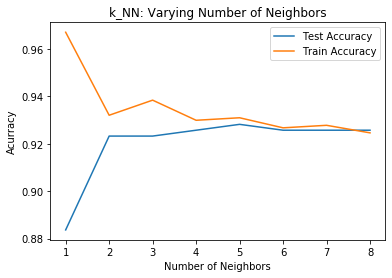

In [91]:
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,np.ravel(y_train))
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)
    
plt.title('k_NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Acurracy')
plt.show()

In [92]:
print(confusion_matrix(y_test,knn_org.predict(X_test)))

[[360   0]
 [ 29  15]]


In [93]:
print(classification_report(y_test,knn_org.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       360
           1       1.00      0.34      0.51        44

    accuracy                           0.93       404
   macro avg       0.96      0.67      0.73       404
weighted avg       0.93      0.93      0.91       404



### Oversampling data set

In [94]:
knn_over = KNeighborsClassifier(n_neighbors = 2)

In [95]:
knn_over.fit(X_train_over,np.ravel(y_train_over))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [96]:
knn_over.score(X_test,y_test)

0.8415841584158416

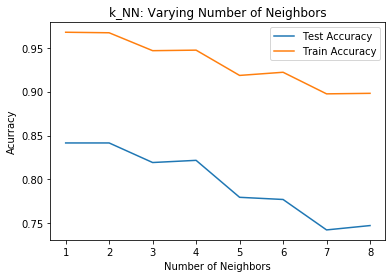

In [97]:
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_over,np.ravel(y_train_over))
    train_accuracy[i]=knn.score(X_train_over,y_train_over)
    test_accuracy[i]=knn.score(X_test,y_test)
    
plt.title('k_NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Acurracy')
plt.show()

In [98]:
print(confusion_matrix(y_test,knn_over.predict(X_test)))

[[321  39]
 [ 25  19]]


In [99]:
print(classification_report(y_test,knn_over.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       360
           1       0.33      0.43      0.37        44

    accuracy                           0.84       404
   macro avg       0.63      0.66      0.64       404
weighted avg       0.86      0.84      0.85       404



### Undersampling Data 

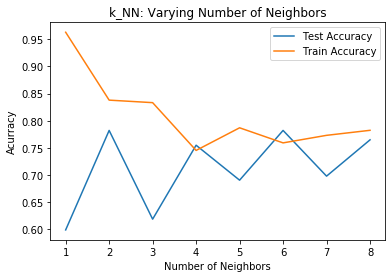

In [100]:
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_under,np.ravel(y_train_under))
    train_accuracy[i]=knn.score(X_train_under,y_train_under)
    test_accuracy[i]=knn.score(X_test,y_test)
    
plt.title('k_NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Acurracy')
plt.show()

In [101]:
knn_under= KNeighborsClassifier(n_neighbors = 6)

In [102]:
knn_under.fit(X_train_under,np.ravel(y_train_under))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [103]:
print(confusion_matrix(y_test,knn_under.predict(X_test)))

[[293  67]
 [ 21  23]]


In [104]:
print(classification_report(y_test,knn_under.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       360
           1       0.26      0.52      0.34        44

    accuracy                           0.78       404
   macro avg       0.59      0.67      0.61       404
weighted avg       0.86      0.78      0.81       404



## Logistic Regression

### Original Data

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [105]:
logreg_org = LogisticRegression()

In [106]:
logreg_org.fit(X_train,np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
print(confusion_matrix(y_test,logreg_org.predict(X_test)))

[[359   1]
 [ 35   9]]


In [108]:
print(classification_report(y_test,logreg_org.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       360
           1       0.90      0.20      0.33        44

    accuracy                           0.91       404
   macro avg       0.91      0.60      0.64       404
weighted avg       0.91      0.91      0.88       404



In [109]:
y_pred_prob_org=logreg_org.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_org)

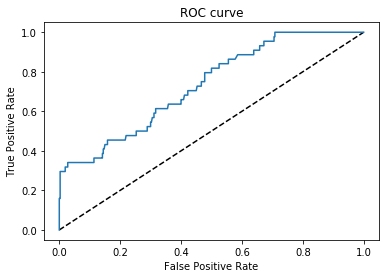

In [110]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [111]:
print(roc_auc_score(y_test,y_pred_prob_org))

0.7324810606060607


### Oversampling Data

In [112]:
logreg_over = LogisticRegression()
logreg_over.fit(X_train_over,np.ravel(y_train_over))
print(confusion_matrix(y_test,logreg_over.predict(X_test)))
print(classification_report(y_test,logreg_over.predict(X_test)))

[[229 131]
 [ 15  29]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76       360
           1       0.18      0.66      0.28        44

    accuracy                           0.64       404
   macro avg       0.56      0.65      0.52       404
weighted avg       0.86      0.64      0.71       404



In [113]:
y_pred_prob_over=logreg_over.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_over)

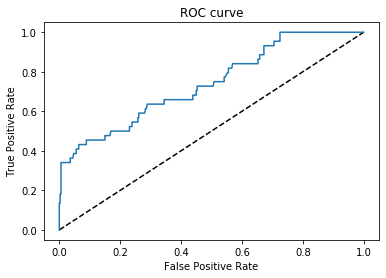

In [114]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [115]:
print(roc_auc_score(y_test,y_pred_prob_over))

0.7402462121212121


### Undersampling

In [116]:
logreg_under = LogisticRegression()
logreg_under.fit(X_train_under,np.ravel(y_train_under))
print(confusion_matrix(y_test,logreg_under.predict(X_test)))
print(classification_report(y_test,logreg_under.predict(X_test)))

[[351   9]
 [ 24  20]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       360
           1       0.69      0.45      0.55        44

    accuracy                           0.92       404
   macro avg       0.81      0.71      0.75       404
weighted avg       0.91      0.92      0.91       404



In [117]:
y_pred_prob_under=logreg_under.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_under)

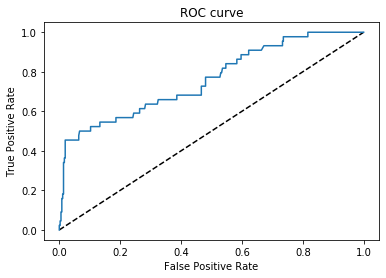

In [118]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [119]:
print(roc_auc_score(y_test,y_pred_prob_under))

0.760132575757576


## Support Vector Machine

### Original Data

In [120]:
svc_org = SVC(kernel="linear", C=0.025, random_state=101)
svc_org.fit(X_train,np.ravel(y_train))
print(confusion_matrix(y_test,svc_org.predict(X_test)))
print(classification_report(y_test,svc_org.predict(X_test)))


[[360   0]
 [ 30  14]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       360
           1       1.00      0.32      0.48        44

    accuracy                           0.93       404
   macro avg       0.96      0.66      0.72       404
weighted avg       0.93      0.93      0.91       404



### Oversampling Data

In [ ]:
svc_over = SVC(kernel="linear", C=0.025, random_state=101)
svc_over.fit(X_train_over,np.ravel(y_train_over))
print(confusion_matrix(y_test,svc_over.predict(X_test)))
print(classification_report(y_test,svc_over.predict(X_test)))

### Undersampling Data

In [125]:
svc_under = SVC(kernel="linear", C=0.025, random_state=101)
svc_under.fit(X_train_under,np.ravel(y_train_under))
print(confusion_matrix(y_test,svc_under.predict(X_test)))
print(classification_report(y_test,svc_under.predict(X_test)))

[[352   8]
 [ 24  20]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       360
           1       0.71      0.45      0.56        44

    accuracy                           0.92       404
   macro avg       0.83      0.72      0.76       404
weighted avg       0.91      0.92      0.91       404



## Stochastic Gradient Descent

### Original Data

In [123]:
from sklearn.linear_model import SGDClassifier

In [128]:
sgd_org = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd_org.fit(X_train, np.ravel(y_train))
print(confusion_matrix(y_test,sgd_org.predict(X_test)))
print(classification_report(y_test,sgd_org.predict(X_test)))


[[358   2]
 [ 26  18]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       360
           1       0.90      0.41      0.56        44

    accuracy                           0.93       404
   macro avg       0.92      0.70      0.76       404
weighted avg       0.93      0.93      0.92       404



### Oversampling Data

In [129]:
sgd_over = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd_over.fit(X_train_over, np.ravel(y_train_over))
print(confusion_matrix(y_test,sgd_over.predict(X_test)))
print(classification_report(y_test,sgd_over.predict(X_test)))



[[327  33]
 [ 23  21]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       360
           1       0.39      0.48      0.43        44

    accuracy                           0.86       404
   macro avg       0.66      0.69      0.67       404
weighted avg       0.87      0.86      0.87       404



### Undersampling Data

In [130]:
sgd_under = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd_under.fit(X_train_under, np.ravel(y_train_under))
print(confusion_matrix(y_test,sgd_under.predict(X_test)))
print(classification_report(y_test,sgd_under.predict(X_test)))

[[193 167]
 [ 14  30]]
              precision    recall  f1-score   support

           0       0.93      0.54      0.68       360
           1       0.15      0.68      0.25        44

    accuracy                           0.55       404
   macro avg       0.54      0.61      0.46       404
weighted avg       0.85      0.55      0.63       404



## Random Forest

### Original Data

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf_org = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None, min_samples_leaf=30)
rf_org.fit(X_train, np.ravel(y_train))
print(confusion_matrix(y_test,rf_org.predict(X_test)))
print(classification_report(y_test,rf_org.predict(X_test)))

[[354   6]
 [ 29  15]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       360
           1       0.71      0.34      0.46        44

    accuracy                           0.91       404
   macro avg       0.82      0.66      0.71       404
weighted avg       0.90      0.91      0.90       404



### Oversampling

In [133]:
rf_over = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None, min_samples_leaf=30)
rf_over.fit(X_train_over, np.ravel(y_train_over))
print(confusion_matrix(y_test,rf_over.predict(X_test)))
print(classification_report(y_test,rf_over.predict(X_test)))

[[332  28]
 [ 24  20]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       360
           1       0.42      0.45      0.43        44

    accuracy                           0.87       404
   macro avg       0.67      0.69      0.68       404
weighted avg       0.88      0.87      0.87       404



### Undersampling

In [134]:
rf_under = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None, min_samples_leaf=30)
rf_under.fit(X_train_under, np.ravel(y_train_under))
print(confusion_matrix(y_test,rf_under.predict(X_test)))
print(classification_report(y_test,rf_under.predict(X_test)))

[[352   8]
 [ 24  20]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       360
           1       0.71      0.45      0.56        44

    accuracy                           0.92       404
   macro avg       0.83      0.72      0.76       404
weighted avg       0.91      0.92      0.91       404



## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

### Original Data

In [135]:
dtree_org = DecisionTreeClassifier(max_depth=10, random_state=101,max_features=None, min_samples_leaf=15)
dtree_org.fit(X_train, np.ravel(y_train))
print(confusion_matrix(y_test,dtree_org.predict(X_test)))
print(classification_report(y_test,dtree_org.predict(X_test)))

[[360   0]
 [ 26  18]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       360
           1       1.00      0.41      0.58        44

    accuracy                           0.94       404
   macro avg       0.97      0.70      0.77       404
weighted avg       0.94      0.94      0.92       404



### Oversampling

In [136]:
dtree_over = DecisionTreeClassifier(max_depth=10, random_state=101,max_features=None, min_samples_leaf=15)
dtree_over.fit(X_train_over, np.ravel(y_train_over))
print(confusion_matrix(y_test,dtree_over.predict(X_test)))
print(classification_report(y_test,dtree_over.predict(X_test)))

[[296  64]
 [ 19  25]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       360
           1       0.28      0.57      0.38        44

    accuracy                           0.79       404
   macro avg       0.61      0.70      0.63       404
weighted avg       0.87      0.79      0.82       404



### Undersampling

In [137]:
dtree_under = DecisionTreeClassifier(max_depth=10, random_state=101,max_features=None, min_samples_leaf=15)
dtree_under.fit(X_train_under, np.ravel(y_train_under))
print(confusion_matrix(y_test,dtree_under.predict(X_test)))
print(classification_report(y_test,dtree_under.predict(X_test)))

[[275  85]
 [ 21  23]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       360
           1       0.21      0.52      0.30        44

    accuracy                           0.74       404
   macro avg       0.57      0.64      0.57       404
weighted avg       0.85      0.74      0.78       404



## Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

### Original

In [138]:
nb_org = GaussianNB()
nb_org.fit(X_train,np.ravel(y_train))
print(confusion_matrix(y_test,nb_org.predict(X_test)))
print(classification_report(y_test,nb_org.predict(X_test)))


[[355   5]
 [ 44   0]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       360
           1       0.00      0.00      0.00        44

    accuracy                           0.88       404
   macro avg       0.44      0.49      0.47       404
weighted avg       0.79      0.88      0.83       404



### Oversampling

In [139]:
nb_over = GaussianNB()
nb_over.fit(X_train_over,np.ravel(y_train_over))
print(confusion_matrix(y_test,nb_over.predict(X_test)))
print(classification_report(y_test,nb_over.predict(X_test)))

[[ 62 298]
 [  0  44]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29       360
           1       0.13      1.00      0.23        44

    accuracy                           0.26       404
   macro avg       0.56      0.59      0.26       404
weighted avg       0.91      0.26      0.29       404



### Undersampling

In [140]:
nb_under = GaussianNB()
nb_under.fit(X_train_under,np.ravel(y_train_under))
print(confusion_matrix(y_test,nb_under.predict(X_test)))
print(classification_report(y_test,nb_under.predict(X_test)))

[[351   9]
 [ 29  15]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       360
           1       0.62      0.34      0.44        44

    accuracy                           0.91       404
   macro avg       0.77      0.66      0.69       404
weighted avg       0.89      0.91      0.89       404



In [142]:
result=pd.read_excel('/Users/vnguyenair/Desktop/vy_capstone1/Result.xlsx')
result.style.set_properties(subset=['Accuracy'], **{'width': '100px'})

,Algorithm,Data,Accuracy,Precision,Recall,f1 -score
0,K-Nearest Neighbor,Original (n-neighbors=5),0.93,0.93,0.93,0.91
1,K-Nearest Neighbor,Oversampling (n-neighbors=2),0.84,0.86,0.84,0.85
2,K-Nearest Neighbor,Undersampling (n-neighbors=6),0.78,0.86,0.78,0.81
3,Logistic Regression,Original,0.91,0.91,0.91,0.88
4,Logistic Regression,Oversampling,0.92,0.91,0.92,0.91
5,Logistic Regression,Undersampling,0.92,0.91,0.92,0.91
6,Support Vector Machine,Original,0.93,0.93,0.93,0.91
7,Support Vector Machine,Oversampling,0.87,0.88,0.87,0.87
8,Support Vector Machine,Undersampling,0.92,0.91,0.92,0.91
9,Stochastic Gradient Descent,Original,0.93,0.93,0.93,0.92


In [ ]:
df_one=df.loc[df['bad'] == 1, :]
df_zero=df.loc[df['bad']==0,:]

In [ ]:
df_one_mean=df_one.mean()
df_mean=df.mean()
df_zero_mean=df_zero.mean()

In [ ]:
compare_mean=pd.DataFrame(index=cols[1:],data={'original mean': df_mean.tolist(),'Bad mean':df_one_mean.tolist(),'Non_Bad mean':df_zero_mean.tolist()})

In [ ]:
print(compare_mean)